# Numerical Integration

As we discussed during the week, differentiation is the technical and always manageable task. In the same time calculation of the definite integral by the **fundamental theorem of calculus** requires _integrability in elementary functions_ (which is not guaranteed at all).

Thus the closest one can get to the estimation of such integral is **numerical approximation**.

We propose you to try yourself in this task following our instructions.

## Quick refresher

Assume that we have some nice smooth function $f(x)$ on a segment $[a,b]$.

To compute definite integral, one should consider tagged partition of the segment:
$$
a=x_0<x_1<x_2<\ldots<x_n=b
$$
with tagging $t_i \in [x_{i-1}, x_i]$. We assume uniform grid:
$$
x_i-x_{i-1}=h
$$
Then Riemann sum is an approximation of the integral:
$$
R(t, h)=\sum_{i=1}^n f(t_i) (x_i-x_{i-1})=h \sum_{i=1}^n f(t_i)
$$

![](pic12.png)

### Task 1. Midpoint rule

Let us start with basic imports: we start with `numpy` and `math` to work with arrays and mathematical functions (for `numpy` introduction and playground you can refer to the last week of our course or your Python course):

In [1]:
import numpy as np
from math import *

Also we import and setup a couple of plotting libraries to make life prettier:

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
sns.set_context("notebook", font_scale=2.0, rc={"lines.linewidth": 4.0})
sns.set_palette('cubehelix')

%matplotlib inline

Now we ask you to implement midpoint rule:

![](pic13.png)

In other words: 
$$
t_i=\frac{x_{i-1}+x_i}{2}
$$
$$
\int_a^b f(x)dx \approx \frac{b-a}{n}\sum_{i=1}^n f\left( \frac{x_{i-1}+x_i}{2} \right) 
$$

Write the function
```
def middle(f, a, b, n):
```
that takes as an input function `f` and returns the Riemann sum by midpoint rule:

In [3]:
def middle(f, a, b, n):
    x = np.linspace(a, b, n+1)
    I = ((b - a)/n)*sum([f((x[i-1]+x[i])/2) for i in range(1,len(x))])
    
    return I

Run the following cell to get automatic basic check of your function (do not change it!):

In [4]:
import checker
checker.exact_checker(middle)

Test 1  |::|  err= 1.00783358958e-05   |::|   time= 0.00015878677368164062 s
Test 1  |::|  accuracy OK
Test 2  |::|  err= 0.000801769309934   |::|   time= 0.00013709068298339844 s
Test 2  |::|  accuracy OK
Test 3  |::|  err= 2.49909183769e-06   |::|   time= 0.0002353191375732422 s
Test 3  |::|  accuracy OK
Passed:  3 /3


### Task 2. Plot the result

Let us also plot a nice picture here. Consider $f(x)=\cos(x)$, $[a,b]=[0, \pi/2]$ and $n=10$. Plot the functions, midpoints, and corresponding reactangles (it is useful to use command `plt.bar`). You should get something like this: 

![](res.png)

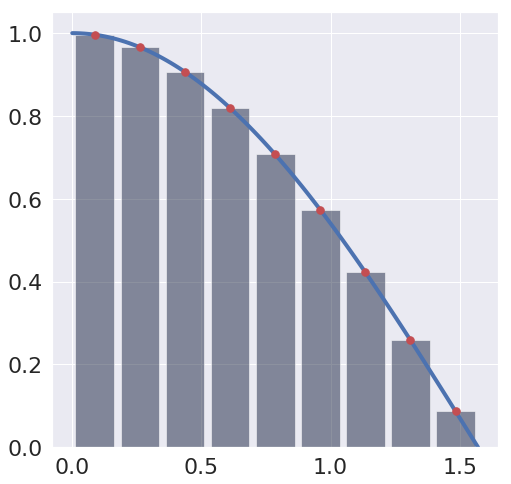

In [5]:
f=lambda x: cos(x)
a=0
b=np.pi/2
n=10

x_bar = np.linspace(a, b, n)
x_bar_midpoint = [(x_bar[i-1]+x_bar[i])/2 for i in range(1,len(x_bar))]
y_bar = np.vectorize(f)(x_bar_midpoint)

x = np.linspace(a, b, n*10)
y = np.vectorize(f)(x)

plt.figure(figsize=(8,8))
plt.bar(x_bar_midpoint, y_bar, width = 0.15, alpha=0.5)
plt.plot(x, y, "b")
plt.plot(x_bar_midpoint, y_bar, "r.", ms = 15)
plt.show()

### Task 3. Trapezoidal rule

The idea here is easily formulated by the picture:
![](pic11.png)
We approximate each segment with trapezoidal area:
$$
\int_a^b f(x)dx=\frac{b-a}{n}\sum_{i=1}^{n} \frac{f(x_{i-1})+f(x_i)}{2}=\frac{b-a}{n}\left(\frac{f(a)+f(b)}{2}+\sum_{i=1}^{n-1} f(x_i)\right)
$$
(basically we use the formula for the area of trapezoidal polygon $S=h\cdot(x+y)/2$ where $h$ is the height of the figure and $x$ and $y$ are lengths of parallel sides).

Write the implementation of the formula:

In [6]:
def trapezoidal(f, a, b, n):
    x = np.linspace(a, b, n+1)
    y = np.vectorize(f)(x)
    I = sum([((b - a) / n)*(y[i-1] + y[i])/ 2 for i in range(1, len(y))])

    return I

Run the following cell to get automatic basic check of your function (do not change it!):

In [7]:
checker.exact_checker(trapezoidal)

Test 1  |::|  err= 2.01566108484e-05   |::|   time= 0.0002522468566894531 s
Test 1  |::|  accuracy OK
Test 2  |::|  err= 0.00140986862456   |::|   time= 0.00019240379333496094 s
Test 2  |::|  accuracy OK
Test 3  |::|  err= 4.7538485286e-06   |::|   time= 0.00029730796813964844 s
Test 3  |::|  accuracy OK
Passed:  3 /3


### Task 4. Simpson's rule

To proceed with the Simpson's rule, we need to improve on the general idea of Riemann sum approximation. Assume the restriction of the function on a segement $[x_{i-1}, x_i]$: instead of using the definition, one could try to approximate given function by one simpler and easier to integrate. 

Simpson's rule uses approximation by the parabolic function per each segment. In order to it, one needs **three** points -- e.g., $f(x_i)$, $f(x_{i+1}$ and $f\left(\frac{x_{i}+x_{i+1}}{2} \right)$ (the general function is described by $ax^2+bx+c$ with three parameters; following linear algebra's _Rank theorem_, one would need at least three linarly independent equations to find those parameters).
![](pic14.png)
Then approximation can be written as follows:
$$
\int_a^b f(x)dx=\frac{b-a}{3n}\left(\sum_{i=1}^{[n/2]} f(x_{2i-2})+4f(x_{2i-1})+f(x_{2i})\right)
$$

Write the implementation of the formula. 

**Note**: the commulitive formula will work for odd $n$ only, that's fine! (It doesn't mean that in the even case Simpson's rule is inadequate; it is just unpleasant to implement).

In [8]:
def simpson(f, a, b, n):

    if n%2 != 0:
        n += 1
    x = np.linspace(a, b, n+1)
    y = np.vectorize(f)(x)

    I = ((b-a) / (3*(n))) * (np.sum([y[2*i-2] + 4*y[2*i-1] + y[2*i] for i in range(1,n//2 + 1)],dtype = np.longdouble) )
    return I

Run the following cell to get automatic basic check of your function (do not change it!):

In [9]:
checker.exact_checker(simpson)

Test 1  |::|  err= 3.1247730293e-10   |::|   time= 0.0002551078796386719 s
Test 1  |::|  accuracy OK
Test 2  |::|  err= 0.00102750615735   |::|   time= 0.00018310546875 s
Test 2  |::|  accuracy OK
Test 3  |::|  err= 8.02731958e-08   |::|   time= 0.00022459030151367188 s
Test 3  |::|  accuracy OK
Passed:  3 /3


## Error estimations

Using **Taylor expansion** of the integrand function, one can establish following estimates of the global errors of the numerical methods.

| **Method** |  &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp;&nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp;  **Formula**   &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp;&nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp;        | **Error**  |&nbsp; &nbsp; &nbsp; &nbsp;&nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp;     **Constant**    &nbsp; &nbsp; &nbsp; &nbsp;&nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp;  |
|---|:--------------------------:|---|---------|
| _Middle Point_  | $\frac{b-a}{n}\sum_{i=1}^n f\left( \frac{x_{i-1}+x_i}{2} \right) $  |  $\frac{(b-a)^3}{12n^2}C$  | $\max_{[a,b]} |f^{(2)}(x)|$ |
| _Trapezoidal_  | $\frac{b-a}{n}\left(\frac{f(a)+f(b)}{2}+\sum_{i=1}^{n-1} f(x_i)\right)$ | $\frac{(b-a)^3}{12n^2}C$  | $\max_{[a,b]} |f^{(2)}(x)|$ |
| _Simpson's rule_  | $\frac{b-a}{3n}\left(\sum_{i=1}^{[n/2]} f(x_{2i-2})+4f(x_{2i-1})+f(x_{2i})\right)$ | $\frac{(b-a)^5}{180n^4}C $  | $\max_{[a,b]} |f^{(4)}(x)|$  |

Let us check this formula in terms of adequacy for both included derivative and order of the $n$.

### Task 5. Error and the derivative

Assume $[a,b]=[0,1]$ and $n=100$. Consider the function $f(x)=e^{ax}$ with varying $a$.
1. Compute exact value of the integral $\int_0^1 e^{ax} dx$ analytically (variable `exact`)
2. Compute and plot errors for **trapezoidal rule** with respect to $a$:

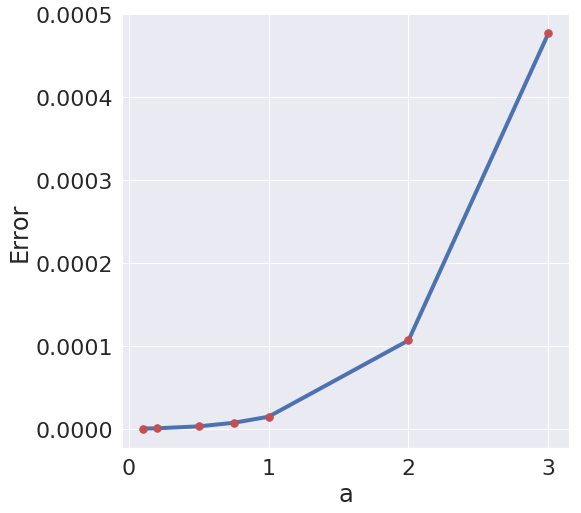

In [10]:
coefs=[0.1, 0.2, 0.5, 0.75, 1.0, 2.0, 3.0]
errs=[]

for a in coefs:
    #your code goes here
    exact= (e**a - 1)/a
    I= trapezoidal(lambda x: e**(a*x), 0, 1, 100)
    err= abs(exact - I)
    errs.append(err)
    
plt.figure(figsize=(8,8))
plt.plot(coefs, errs, "b")
plt.plot(coefs, errs, "r.", ms=15)
plt.xlabel('a')
plt.ylabel('Error')
plt.show()

### Task 6. Error and number of steps

Assume $[a,b]=[0,\pi/2]$. Consider the function $f(x)=\sin{x}$.
1. Compute exact value of the integral $\int_0^{\pi/2} \sin{x} dx$ analytically (variable `exact`)
2. Compute and plot errors for different values of $n$ for **all three methods**:

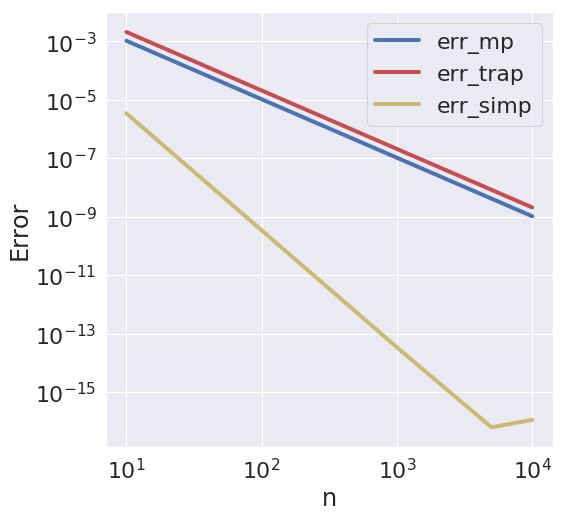

In [11]:
ns=[10, 50, 100, 500, 1000, 5000, 10000]
errs_mp=[]
errs_trap=[]
errs_simp=[]
errs_simp2=[]


exact= 1
f= lambda x: np.sin(x)
a= 0
b= np.pi/2

for n in ns:

    errs_mp.append(abs(exact - middle(f, a, b, n)))
    errs_trap.append(abs(exact - trapezoidal(f, a, b, n)))
    errs_simp.append(abs(exact - simpson(f, a, b, n)))

plt.figure(figsize=(8,8))
plt.plot(ns, errs_mp, "b" ,label = 'err_mp')
plt.plot(ns, errs_trap, "r" ,label = 'err_trap')
plt.plot(ns, errs_simp, "y" ,label = 'err_simp')

plt.yscale('log')
plt.xscale('log')
plt.xlabel('n')
plt.ylabel('Error')
plt.legend()
plt.show()

## Task 7. Results

Answer following questions in the field below:
1. By comparing three method which one is best to use for the function $x^x$?
2. Does estimations of error for $e^{ax}$ coincide with theoretical upper boundary per $a$? If not, where is the problem?
3. Does estimations of error for $\sin {x}$ coincide with theoretical upper boundary per $n$? If not, where is the problem?

### 1. By comparing three method which one is best to use for the function $x^x$?  
To do so, let's analyze error bounds for all three methods as functions of f, a, b, n:
 $$\text{Error_Trapezoidal(f, a, b, n)} <\frac{(b-a)^3}{12n^2}C  ;\quad \text{where C = } \max_{[a,b]} |f^{(2)}(x)|$$
 $$\text{Error_Middle_Point(f, a, b, n)} <\frac{(b-a)^3}{24n^2}C  ;\quad \text{where C = } \max_{[a,b]} |f^{(2)}(x)|$$
 $$\text{Error_Simpson(f, a, b, n)} <\frac{(b-a)^5}{180n^4}C  ;\quad \text{where C = } \max_{[a,b]} |f^{(4)}(x)|$$  
 Lets calculate the derivative of $x^x$:  
 $$ f(x) = x^x $$
 $$ f^{(1)}(x)=x^{x} (\log{(x)} + 1)$$
 $$ \boxed{f^{(2)}(x) = x^{x} ((\log{(x)} + 1)^{2} + \frac{1}{x})}$$
 $$ f^{(3)}(x) = x^{x} ((\log{(x)} + 1)^{3} + \frac{3 (\log{(x)} + 1)}{x} - \frac{1}{x^{2}})$$
 $$ \boxed{f^{(4)}(x) = x^{x} ((\log{(x)} + 1)^{4} + \frac{6(\log{(x)} + 1)^{2}}{x} - \frac{4(\log{(x)} + 1)}{x^{2}} + \frac{3}{x^{2}} + \frac{2}{x^{3}})}$$  

We can see that $ f^{(4)}(x)$ is growing faster than $ f^{(2)}(x)$, but it is not enough to make a decision as there are another variables.  

Lets implement those functions and simulate:



In [17]:
#Second derivative:
def df_2(x):
    return (x**x)*((log(x) + 1)**2 + 1/x)

#Fourth derivative:
def df_4(x):
    return (x**x)*((log(x) + 1)**4 + 6*(log(x) + 1)**2/x - 4*(log(x) + 1)/x**2 + 3/x**2 + 2/x**3)

#Error bound for midpoint
def err_mid(df_2, a, b, n):
    x = np.linspace(a, b, n+1)
    M = max([abs(df_2(x)) for x in x])
    return (M * (b-a)**3)/(24*n**2)

#Error bound for trapezoidal
def err_trap(df_2, a, b, n):
    x = np.linspace(a, b, n+1)
    M = max([abs(df_2(x)) for x in x])
    return (M * (b-a)**3)/(12*n**2)

#Error bound for Simpson
def err_simp(df_4, a, b, n):
    x = np.linspace(a, b, n+1)
    M = max([abs(df_4(x)) for x in x])
    return (M * (b-a)**5)/(180*n**4)

Now lets plot 3D graph of errors on [a,b] = [0, 6] and n = [100,5000]:

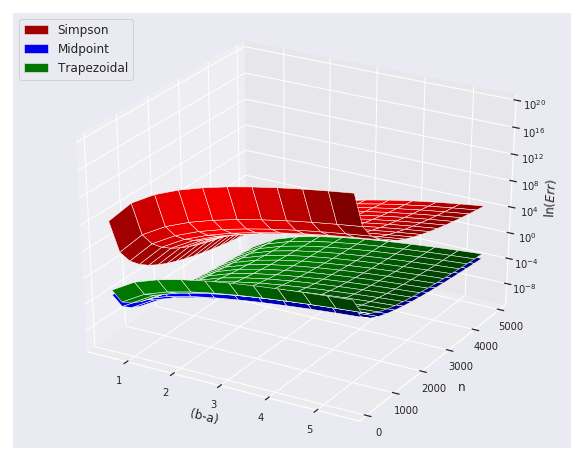

In [29]:
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
from matplotlib.ticker import LinearLocator
from mpl_toolkits.mplot3d import Axes3D


def log_tick_formatter(val, pos=None):
    return f"$10^{{{int(val)}}}$" 

def df_2(x):
    return (x**x)*((log(x) + 1)**2 + 1/x)
def df_4(x):
    return (x**x)*((log(x) + 1)**4 + 6*(log(x) + 1)**2/x - 4*(log(x) + 1)/x**2 + 3/x**2 + 2/x**3)


a = 0.00001
b = np.arange(a, 6, 0.5)[1:]
n = np.arange(100, 5000, 300)
b, n = np.meshgrid(b, n)

z_mid = np.vectorize(err_mid)(df_2,a,b,n)
z_trap = np.vectorize(err_trap)(df_2,a,b,n)
z_simp = np.vectorize(err_simp)(df_4,a,b,n)

fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111, projection='3d')


# Plot the surface
c1 = ax.plot_surface(b, n, np.log(z_simp),color ='red', alpha=1, rstride=1, 
                cstride=1, linewidth=0.5, antialiased=True, label='Simpson')
c1._facecolors2d=c1._facecolors3d
c1._edgecolors2d=c1._edgecolors3d
c2 = ax.plot_surface(b, n, np.log(z_mid), color ='blue', alpha=1, rstride=1,
                cstride=1, linewidth=0.5, antialiased=True, label='Midpoint')
c2._facecolors2d=c2._facecolors3d
c2._edgecolors2d=c2._edgecolors3d
c3 = ax.plot_surface(b, n, np.log(z_trap), color='green', alpha=1, rstride=1,
                cstride=1, linewidth=0.5, antialiased=True, label='Trapezoidal')
c3._facecolors2d=c3._facecolors3d
c3._edgecolors2d=c3._edgecolors3d

ax.zaxis.set_major_formatter(mticker.FuncFormatter(log_tick_formatter))
ax.zaxis.set_major_locator(mticker.MaxNLocator(integer=True))
#ax.yaxis.set_major_locator(LinearLocator(5))
for t in ax.zaxis.get_major_ticks(): t.label.set_fontsize(10)
for t in ax.xaxis.get_major_ticks(): t.label.set_fontsize(10)
for t in ax.yaxis.get_major_ticks(): t.label.set_fontsize(10)
ax.legend(loc='upper left', fontsize=12)
ax.set_xlabel('(b-a)', fontsize=12)
ax.set_ylabel('n', fontsize=12)
ax.set_zlabel('$\ln(Err)$', fontsize=12)
plt.show()

As we can see from chart above: the lowest theoretical bound is for Midpoint method, than goes Trapezoidal and the biggest theoretical error is for Simpson.
So the best method for $x^x$ is Midpoint method.

### 2. Does estimations of error for  $e^{ax}$  coincide with theoretical upper boundary per  a ? If not, where is the problem?

Lets analyze the theoretical error bound for $e^{ax}$:

$$\text{Error_Trapezoidal(f, a, b, n)} <\frac{(b-a)^3}{12n^2}C  ;\quad \text{where C = } \max_{[a,b]} |f^{(2)}(x)|$$
 
 Lets calculate the derivative of $e^{ax}$:  
 $$ f(x) = e^{ax} $$
 $$ f^{(1)}(x)=a e^{a x}$$
 $$ \boxed{f^{(2)}(x) = a^{2} e^{a x}}$$  
 Lets implement theoretical error bound:




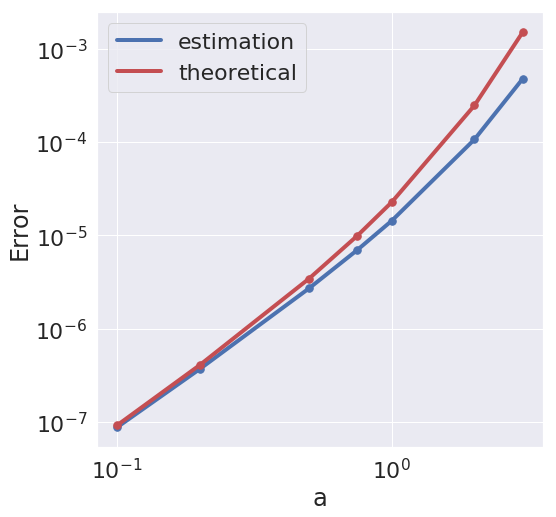

In [19]:
coefs=[0.1, 0.2, 0.5, 0.75, 1.0, 2.0, 3.0]
errs=[]
errs_theor_trap = []
for a in coefs:
    exact= (e**a - 1)/a
    I= trapezoidal(lambda x: e**(a*x), 0, 1, 100)
    err= abs(exact - I)
    errs.append(err)
    errs_theor_trap.append(err_trap(lambda x: a**2*exp(a*x), 0, 1, 100))


plt.figure(figsize=(8,8))
plt.plot(coefs, errs, "b", label = "estimation")
plt.plot(coefs, errs, "b.", ms=15)
plt.plot(coefs, errs_theor_trap, "r", label = "theoretical")
plt.plot(coefs, errs_theor_trap, "r.", ms=15)
plt.yscale('log')
plt.xscale('log')
plt.xlabel("a")
plt.ylabel("Error")
plt.legend()
plt.show()

We can see that our estimated error is below upper theretical limit for all a, which coincides with our proposal. Thus we see slight increase in differance between estimated area and theoretical error bound. I assume thats could be due to approximate representation of e. Exponent is irrational number thus can not be represented as finite digit number. So we will have to deal with approximate $ e_{real} ^{ax}=(e_{float} + \Delta e)^{ax}$ and error term is increasing with the increase of a.

#### 3. Does estimations of error for $\sin {x}$ coincide with theoretical upper boundary per $n$? If not, where is the problem?
Again we will use our theoretical error bound as functions of f, a, b, n:
 $$\text{Error_Trapezoidal(f, a, b, n)} <\frac{(b-a)^3}{12n^2}C  ;\quad \text{where C = } \max_{[a,b]} |f^{(2)}(x)|$$
 $$\text{Error_Middle_Point(f, a, b, n)} <\frac{(b-a)^3}{24n^2}C  ;\quad \text{where C = } \max_{[a,b]} |f^{(2)}(x)|$$
 $$\text{Error_Simpson(f, a, b, n)} <\frac{(b-a)^5}{180n^4}C  ;\quad \text{where C = } \max_{[a,b]} |f^{(4)}(x)|$$  
 Lets calculate the derivative of $sin(x)$:  
 $$ f(x) = sin(x) $$
 $$ f^{(1)}(x)=cos(x)$$
 $$\boxed{ f^{(2)}(x) = -sin(x)}$$
 $$ f^{(3)}(x) = -cos(x)$$
 $$\boxed{ f^{(4)}(x) = sin(x)}$$  
 And plot theoretical and estimated errors:


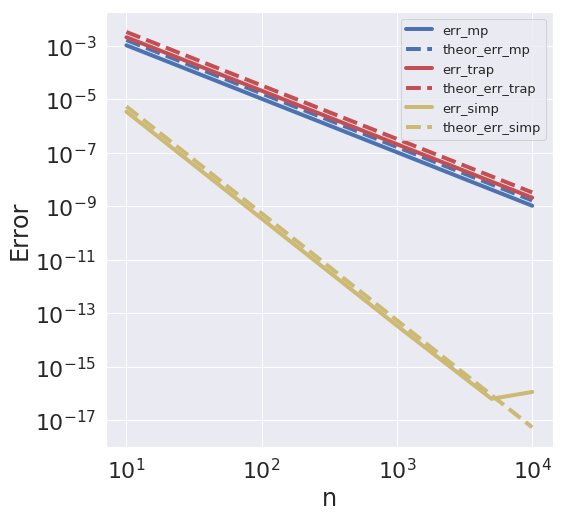

In [20]:
ns=[10, 50, 100, 500, 1000, 5000, 10000]
errs_mp=[]
errs_trap=[]
errs_simp=[]
errs_simp2=[]
t_errs_trap=[]
t_errs_simp=[]
t_errs_mp=[]

exact= 1
f= lambda x: np.sin(x)
a= 0
b= np.pi/2

#Second derivative
def df_2(x):
    return -sin(x)

#Fourth derivative
def df_4(x):
    return sin(x)

for n in ns:

    errs_mp.append(abs(exact - middle(f, a, b, n)))
    errs_trap.append(abs(exact - trapezoidal(f, a, b, n)))
    errs_simp.append(abs(exact - simpson(f, a, b, n)))
    t_errs_mp.append(err_mid(df_2, a, b, n))
    t_errs_trap.append(err_trap(df_2, a, b, n))
    t_errs_simp.append(err_simp(df_4, a, b, n))

plt.figure(figsize=(8,8))
plt.plot(ns, errs_mp, "b" ,label = 'err_mp')
plt.plot(ns, t_errs_mp, "b--" ,label = 'theor_err_mp')
plt.plot(ns, errs_trap, "r" ,label = 'err_trap')
plt.plot(ns, t_errs_trap, "r--" ,label = 'theor_err_trap')
plt.plot(ns, errs_simp, "y" ,label = 'err_simp')
plt.plot(ns, t_errs_simp, "y--" ,label = 'theor_err_simp')

plt.yscale('log')
plt.xscale('log')
plt.xlabel("n")
plt.ylabel("Error")
plt.legend(fontsize=13)
plt.show()

In [16]:
import sys
print("float epsilon: ",sys.float_info.epsilon)
print("simpson error: ",errs_simp[-1])

float epsilon:  2.220446049250313e-16
simpson error:  1.11835454092e-16


We can see that our estimated error is below upper theretical limit for all a, which coincides with our proposal.  
Except for the last point of Simpson method, where our error almost reach the limit of float point precision. So that anomaly could be explained by round-off error of float arithmetic.